<h1>Task 4</h1>

In [3]:
# libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# preprocessing step
df = data_prep()

# random state
rs = 10

# train test split
y = df['ORGYN']
x = df.drop(['ORGYN'], axis=1)
x_mat = x.as_matrix()
x_train, x_test, y_train, y_test = train_test_split(x_mat, y, test_size=0.3, stratify=y, random_state=rs)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train, y_train)
x_test = scaler.transform(x_test)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 36 columns):
AGE                    22223 non-null float64
ORGYN                  22223 non-null int64
AFFL                   22223 non-null float64
LTIME                  22223 non-null float64
GENDER_F               22223 non-null uint8
GENDER_M               22223 non-null uint8
GENDER_U               22223 non-null uint8
TV_REG_Border          22223 non-null uint8
TV_REG_C Scotland      22223 non-null uint8
TV_REG_East            22223 non-null uint8
TV_REG_London          22223 non-null uint8
TV_REG_Midlands        22223 non-null uint8
TV_REG_N East          22223 non-null uint8
TV_REG_N Scot          22223 non-null uint8
TV_REG_N West          22223 non-null uint8
TV_REG_S & S East      22223 non-null uint8
TV_REG_S West          22223 non-null uint8
TV_REG_Ulster          22223 non-null uint8
TV_REG_Wales & West    22223 non-null uint8
TV_REG_Yorkshire       22223 non-null uint8
NGROU

In [4]:
#can get better results with skew

<h1>Building neural network</h1>

In [39]:
model = MLPClassifier(random_state=rs)
model.fit(x_train, y_train)

print("Train accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print(model)

Train accuracy: 0.8209694008742607
Test accuracy: 0.8089095545222739
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.70      0.39      0.51      1652

avg / total       0.80      0.81      0.79      6667

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [40]:
iterations = model.n_iter_
print(iterations)

101


In [47]:
model = MLPClassifier(max_iter=101, random_state=rs)
model.fit(x_train, y_train)

print("Train accuracy:", model.score(x_train, y_train))
print("Test accuracy:", model.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print(model)

Train accuracy: 0.8209694008742607
Test accuracy: 0.8089095545222739
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.70      0.39      0.51      1652

avg / total       0.80      0.81      0.79      6667

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=101, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [10]:
print(x_train.shape)

(15556, 35)


<h3>Hidden layer</h3>

In [11]:
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 20)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10)
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))

y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.8098482900488557
Test accuracy: 0.8146092695365231
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      5015
          1       0.71      0.42      0.53      1652

avg / total       0.80      0.81      0.80      6667

{'hidden_layer_sizes': (5,)}


In [52]:
model2 = MLPClassifier(hidden_layer_sizes=(5,), random_state=rs)
model2.fit(x_train, y_train)

print("Train accuracy:", model2.score(x_train, y_train))
print("Test accuracy:", model2.score(x_test, y_test))

y_pred = model2.predict(x_test)
print(classification_report(y_test, y_pred))

print(model2)

Train accuracy: 0.8098482900488557
Test accuracy: 0.8146092695365231
             precision    recall  f1-score   support

          0       0.83      0.94      0.88      5015
          1       0.71      0.42      0.53      1652

avg / total       0.80      0.81      0.80      6667

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [53]:
iterations = model2.n_iter_
print(iterations)

58


In [13]:
# new parameters
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10)
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))

y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.8103625610696837
Test accuracy: 0.8147592620368982
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.72      0.41      0.52      1652

avg / total       0.80      0.81      0.80      6667

{'hidden_layer_sizes': (3,)}


In [14]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10,)
cv.fit(x_train, y_train)

print("Train accuracy:", cv.score(x_train, y_train))
print("Test accuracy:", cv.score(x_test, y_test))

y_pred = cv.predict(x_test)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.8099125739264592
Test accuracy: 0.8147592620368982
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.72      0.41      0.52      1652

avg / total       0.80      0.81      0.80      6667

{'alpha': 0.001, 'hidden_layer_sizes': (3,)}


In [54]:
model3 = MLPClassifier(hidden_layer_sizes=(3,), random_state=rs, alpha = 0.001)
model3.fit(x_train, y_train)

print("Train accuracy:", model3.score(x_train, y_train))
print("Test accuracy:", model3.score(x_test, y_test))

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

print(model3)

Train accuracy: 0.8099125739264592
Test accuracy: 0.8147592620368982
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.70      0.39      0.51      1652

avg / total       0.80      0.81      0.79      6667

MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)


In [55]:
iterations = model3.n_iter_
print(iterations)

43


<h3> Log transformation </h3>

In [15]:
import numpy as np

# list columns to be transformed
columns_to_transform = ['AFFL', 'LTIME']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)
    
# create X, y and train test data partitions
y_log = df_log['ORGYN']
x_log = df_log.drop(['ORGYN'], axis=1)
x_mat_log = x_log.as_matrix()
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
x_train_log = scaler_log.fit_transform(x_train_log, y_train_log)
x_test_log = scaler_log.transform(x_test_log)

In [16]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10)
cv.fit(x_train_log, y_train_log)

print("Train accuracy:", cv.score(x_train_log, y_train_log))
print("Test accuracy:", cv.score(x_test_log, y_test_log))

y_pred = cv.predict(x_test_log)
print(classification_report(y_test_log, y_pred))

print(cv.best_params_)

Train accuracy: 0.8106196965800977
Test accuracy: 0.8131093445327734
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.71      0.41      0.52      1652

avg / total       0.80      0.81      0.79      6667

{'alpha': 0.01, 'hidden_layer_sizes': (3,)}


<h3>RFE</h3>

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(x_train_log, y_train_log)

print(rfe.n_features_)

5


In [81]:
# transform log 
x_train_rfe = rfe.transform(x_train_log)
x_test_rfe = rfe.transform(x_test_log)

# step = int((X_train_rfe.shape[1] + 5)/5);
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10)
cv.fit(x_train_rfe, y_train_log)

print("Train accuracy:", cv.score(x_train_rfe, y_train_log))
print("Test accuracy:", cv.score(x_test_rfe, y_test_log))

y_pred = cv.predict(x_test_rfe)
print(classification_report(y_test_log, y_pred))

print(cv.best_params_)

Train accuracy: 0.8113911031113397
Test accuracy: 0.8174591270436479
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.72      0.43      0.54      1652

avg / total       0.81      0.82      0.80      6667

{'alpha': 0.001, 'hidden_layer_sizes': (7,)}


In [82]:
#Training model
model_rfe = LogisticRegression(random_state=rs)

# fit it to training data
model_rfe.fit(x_train_rfe, y_train_log)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [83]:
# grab feature importances from the model and feature name from the original X
coef = model_rfe.coef_[0]
feature_names = x.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:100]

for i in indices:
    print(feature_names[i], ':', coef[i])

AFFL : 0.8508596998119665
AGE : -0.6665423104370233
GENDER_M : -0.39035606439382287
LTIME : 0.3844193592509279
GENDER_F : -0.08547623714957651


<h3> Selecting using decision tree </h3>

In [90]:
from sklearn.tree import DecisionTreeClassifier

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 8),
          'min_samples_leaf': range(20, 61, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_train_log, y_train_log)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(3, 8), 'min_samples_leaf': range(20, 61, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
from dm_tools import analyse_feature_importance

analyse_feature_importance(cv.best_estimator_, x_log.columns)

AGE : 0.4604840471690019
AFFL : 0.3459657735007613
GENDER_F : 0.1849788387302646
GENDER_M : 0.008571340599972204
TV_REG_London : 0.0
TV_REG_S & S East : 0.0
TV_REG_N West : 0.0
TV_REG_N Scot : 0.0
TV_REG_N East : 0.0
TV_REG_Midlands : 0.0
TV_REG_C Scotland : 0.0
TV_REG_East : 0.0
TV_REG_Ulster : 0.0
TV_REG_Border : 0.0
GENDER_U : 0.0
LTIME : 0.0
TV_REG_S West : 0.0
CLASS_Tin : 0.0
CLASS_Silver : 0.0
REGION_Midlands : 0.0


In [92]:
from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
x_train_sel_model = selectmodel.transform(x_train_log)
x_test_sel_model = selectmodel.transform(x_test_log)

print(x_train_sel_model.shape)

(15556, 3)


In [93]:
model_sel_model = DecisionTreeClassifier(random_state = rs)
model_sel_model.fit(x_train_sel_model, y_train_log)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [94]:
analyse_feature_importance(model_sel_model, x_log.columns)

AGE : 0.546750238756825
AFFL : 0.33386261971829684
LTIME : 0.1193871415248782


In [95]:
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10)
cv.fit(x_train_sel_model, y_train)

print("Train accuracy:", cv.score(x_train_sel_model, y_train))
print("Test accuracy:", cv.score(x_test_sel_model, y_test))

y_pred = cv.predict(x_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

Train accuracy: 0.8110696837233222
Test accuracy: 0.8173091345432728
             precision    recall  f1-score   support

          0       0.83      0.95      0.89      5015
          1       0.73      0.42      0.53      1652

avg / total       0.81      0.82      0.80      6667

{'alpha': 0.01, 'hidden_layer_sizes': (9,)}


<h2>Comparing models</h2>

In [24]:
# grid search CV for decision tree
params_dt = {'criterion': ['gini'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(40, 61, 5)}

cv = GridSearchCV(param_grid=params_dt, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(x_train, y_train)

dt_model = cv.best_estimator_
print(dt_model)

# grid search CV for logistic regression
params_log_reg = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params_log_reg, estimator=LogisticRegression(random_state=rs), cv=10)
cv.fit(x_train, y_train)

log_reg_model = cv.best_estimator_
print(log_reg_model)

# grid search CV for NN
params_nn = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params_nn, estimator=MLPClassifier(max_iter=500, random_state=rs), cv=10)
cv.fit(x_train, y_train)

nn_model = cv.best_estimator_
print(nn_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=55, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, v

<h3>Test accuracy</h3>

In [26]:
y_pred_dt = dt_model.predict(x_test)
y_pred_log_reg = log_reg_model.predict(x_test)
y_pred_nn = nn_model.predict(x_test)

print("Accuracy score on test for DT:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for logistic regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy score on test for NN:", accuracy_score(y_test, y_pred_nn))

Accuracy score on test for DT: 0.8108594570271487
Accuracy score on test for logistic regression: 0.8137093145342733
Accuracy score on test for NN: 0.8147592620368982


### The Area under an ROC curve (ROC AUC)

In [27]:
# typical prediction
y_pred = dt_model.predict(x_test)

# probability prediction from decision tree
y_pred_proba_dt = dt_model.predict_proba(x_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.3715545755237045 	 0.6284454244762955 	 1
0.9515121219695076 	 0.04848787803049238 	 0
0.7490297542043984 	 0.25097024579560157 	 0
0.7490297542043984 	 0.25097024579560157 	 0
0.7490297542043984 	 0.25097024579560157 	 0
0.3715545755237045 	 0.6284454244762955 	 1
0.8915073365940418 	 0.1084926634059582 	 0
0.8915073365940418 	 0.1084926634059582 	 0
0.47703180212014135 	 0.5229681978798587 	 1
0.7490297542043984 	 0.25097024579560157 	 0
0.8897700237906423 	 0.11022997620935765 	 0
0.7757255936675461 	 0.22427440633245382 	 0
0.9515121219695076 	 0.04848787803049238 	 0
0.7490297542043984 	 0.25097024579560157 	 0
0.8476190476190476 	 0.1523809523809524 	 0
0.24166666666666667 	 0.7583333333333333 	 1
0.5949177877428998 	 0.40508221225710017 	 0
0.6875 	 0.3125 	 0
0.

In [28]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = dt_model.predict_proba(x_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(x_test)
y_pred_proba_nn = nn_model.predict_proba(x_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])

print("ROC index on test for DT:", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN:", roc_index_nn)

ROC index on test for DT: 0.8068155702384372
ROC index on test for logistic regression: 0.8096659778533648
ROC index on test for NN: 0.8117872170413698


In [29]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:,1])

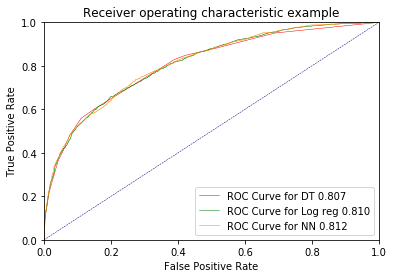

In [31]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg, label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg), color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn), color='darkorange', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Task 5

In [32]:
# import the model
from sklearn.ensemble import VotingClassifier

# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_model), ('lr', log_reg_model), ('nn', nn_model)], voting='soft')

In [34]:
# fit the voting classifier to training data
voting.fit(x_train, y_train)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(x_train, y_train))
print("Ensemble test accuracy:", voting.score(x_test, y_test))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(x_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)

Ensemble train accuracy: 0.8140910259706865
Ensemble test accuracy: 0.8213589320533974
ROC score of voting classifier: 0.8187988697346217


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
